# DATA_SCI 422 and EARTH 353 | Exercise 1

## Multilateration (locate a signal source)

**General**

The location of an event is described by its coordinates in three-dimensional space and the time at which it occurred, which is called the origin time. When it occurs the event emits signals that can be measured by detectors. The arrival time of these signals at the detectors can be compared to theoretical arrival times, computed by assuming a location and origin time and setting the arrival time as the sum of the origin time and the distance traveled to each station divided by the velocity with which the signals traveled. The computation of theoretical arrival times is called the *forward problem*. 

If the emitted signals were measured by detectors, we can use the arrival times of the signals to infer the location and origin time of the event. As you know from the course notes, this task of inference is called the *inverse problem*. Both the forward and the inverse problem require the same knowledge of the theory and model that describe how the signal propagates to the detectors.

The process of locating an event using measurements at multiple detectors is called multilateration. When using only three detectors, it’s called trilateration, but it is often colloquially referred to as “triangulation”, which is a misnomer.

The same solution methods for this inverse problem as the one we explore here, conceptually apply to many types of multilateration cases (GPS-based navigation, ocean acoustics (for biological and defense purposes, such as locating whales or submarines), violent city crime (e.g. locating gun shots), astrophysics (locating binary black-hole mergers), signal processing (locating wifi scatterers), glaciology (icequakes or ice calving events, etc.).


**Specific application: 
Find the hypocenter and origin time of a January 2019 earthquake in Alaska**

Here we apply multilateration to the problem of determining the location (hypocenter) and origin time (the time at which “the fault slipped”). The hypocenter is an earthquake’s location in three dimensions and has three unknown parmeters: latitude, longitude, and depth. The epicenter is the location in two dimensions, described by only the latitude and longitude of the hypocenter.

Thus, the event is an earthquake (rocks suddenly move in opposite directions across a fault, releasing elastic energy), the sdignals emitted are seismic waves, and the detectors that measure the signals are seismometers, sensitive instruments that record ground motion over broad frequency bands within a large dynamic range.

The seismic waves generated by an earthquake are registered at seismic stations. An earthquake can be located using the arrival times of these seismic (P) waves as measured at several seismic stations (detectors). In this exercise we will invert P-wave arrival times for the location and origin time of an earthquake.



**Background: 2019 earthquake in Alaska**

Early in 2019 a M5.2 (magnitude 5.2) earthquake occurred East-Southeast of King Salmon, Alaska. The earthquake occurred over a 100 km beneath a remote national park and resulted in weak to light shaking in the vicinity of the epicenter. Due to the moderate magnitude, deep hypocenter, and sparse population, no damage occurred. "No damage" is a typical outcome for earthquakes in Alaska, with a few notable exceptions that we should all be concerned about. Alaska is the most seismically active state of the United States.

Rapidly locating earthquake hypocenters with reliable algorithms is one of the responsibilities of the United States Geological Survey (USGS) as this helps assess the impact and direct emergency personnel when it is most needed. It further helps for estimating where, how strong, and how many aftershocks, which can cause additional damage and distress, could occur. On longer time scales, it's important to know the locations of earthquakes to explain the physics of the Earth, including how seismic waves propagate, how elastic properties of the Earth's interior vary spatially, what processes and forces govern the Earth's interior, and for explanations and predictions of a multitude of observations at seismometers.


**Theory**

A $P$ wave is the fastest-propagating type of seismic wave generated by earthquakes. You will locate the epicenter of one of the Puerto Rico earthquakes using $P$ wave arrival times measured at seismic stations. Assume that the $P$ waves travel with a constant, known velocity $\alpha $ = 7.7 km/s along straight wave paths from the earthquake's hypocenter to the station. Although a seismologist would not consider these to be valid assumptions, we will see that they are not unreasonable within the confines of this exercise.

A $P$ wave's arrival time $t_i $ at the $i-th $ station depends on the origin time $t_o $ and the distance $D_i $

to the hypocenter $(x_o,y_o,z_o) $ as follows: 
$$t_i = {t_o} + \frac{D_i (x_o,y_o,z_o)}{\alpha} ,$$
where 
$$D_i (x_o,y_o,z_o) = \sqrt{(x_i-x_o)^2 + (y_i-y_o)^2 + (z_i-z_o)^2} .$$ 

**Question 1**: Given the above equations, is retrieving the hypocenter from $P$ wave arrival times a linear or a non-linear inverse problem? Why?

----------> Answer: Retrieving the hypocenter from P wave arrival times is a NON-LINEAR INVERSE PROBLEM because the distance is not linearly proportional to the hypocenter at (x,y,z). The P wave arrival times (which will later become our data vector d) are dependent on distance and the hypocenter at (x,y,z). Formally, if the model values is changed by being multiplied by a factor, the arrival time is not also equally scaled by the factor. 

**Question 2**: From how many stations do we need observed $P$ wave arrival times to resolve the origin time and hypocenter of an earthquake? Explain your answer.

----------> Answer: There are currently four unknowns $(x_o, y_o, z_o, t_o)$ where $x_o$ is longitude, $y_o$ is latitude, $z_o$ is elevation/depth, and $t_o$ is origin time. Five equations are required to solve for four unknowns, so we need FIVE STATIONS are needed resolve the origin time and hypocenter of an earthquake. The way that we come to this conclusion is that the arrival time is linearly dependent on $t_o$, one station arrival time is required to resolve $t_o$. With a known $t_o$, we now have three unknowns and need data from four stations to resolve the hypocenter. The analogy introduced in class is to think of four hollow spheres around four stations that intersect at one unique point. However, with some common sense or pre-knowlede that the hypocenter of an earthquake is below the surface, we may only need three stations and corresponding spheres, as this intersection leads to 2 points, one of which is above and the other is below the surface. To summarize, we need FIVE STATIONS mathematically. 

Think about the above equation, in particular with respect to which variables represent data and which variables represent the model (or, the set of parameters we wish to infer). You want to write the equation in such a way that the data are on the left-hand side of the $= $ sign and the function that predicts the data from the model parameters is on the right-hand side. 

**Constructing the inverse problem**

Since determining the depth of an earthquake is the most challenging part of earthquake locating practice, we fix the earthquake's depth in this exercise to $z_o $ = 120 km. The way we go about solving this system of equations (one per measured arrival time for a given station) is by firstly making an educated initial guess of the origin time and epicenter, say $(t_o, x_o, y_o)$ and, secondly, approximating $D_i (x_o,y_o,z_o) $ by a first-order Taylor Expansion around this initial guess. The approximated equation will then have factors of the form $(\widehat{x_o} - x_o) $, etc., where $(\widehat{t_o}, \widehat{x_o}, \widehat{y_o})$ is your new and updated, yet unknown estimate of the earthquake's origin parameters. 

**Question 3**: Evaluate this first-order Taylor expansion and insert it in the first equation for $t_i $ above. Also replace $t_o $ by $\widehat{t_o} $, where you could write $\widehat{t_o} = \widehat{t_o} - t_o + t_o $. Alternatively: Directly Taylor-expand equation (1) around $(t_o, x_o, y_o)$. Provide the result here:

----------> Answer: 
$$D_i (x_o,y_o,z_o) = \sqrt{(x_i-x_o)^2 + (y_i-y_o)^2 + (z_i-z_o)^2} .$$ 

$$ t_i = \widehat{t_o} - t_o + t_o + \frac{1}{\alpha} (D_i(x_o, y_o, z_o)) - \frac{1}{\alpha} (\frac{(x_i - x_o) ( \widehat{x_o} - x_o)} {\sqrt{(x_i-x_o)^2 + (y_i-y_o)^2 + (z_i-z_o)^2}}  + \frac{(y_i - y_o) ( \widehat{y_o} - y_o)} {\sqrt{(x_i-x_o)^2 + (y_i-y_o)^2 + (z_i-z_o)^2}} + \frac{(z_i - z_o) ( \widehat{z_o} - z_o)} {\sqrt{(x_i-x_o)^2 + (y_i-y_o)^2 + (z_i-z_o)^2}}) $$

Since we have fixed the earthquake's depth to $z_o$ = 120 (from prompt), we should now only have 3 unknowns: 

$$ t_i = \widehat{t_o} - t_o + t_o + \frac{1}{\alpha} (D_i(x_o, y_o, z_o)) - \frac{1}{\alpha} (\frac{(x_i - x_o) ( \widehat{x_o} - x_o)} {(D_i(x_o, y_o, z_o))}  - \frac{(y_i - y_o) ( \widehat{y_o} - y_o)} {(D_i(x_o, y_o, z_o))}) $$

From Question 4 prompt: 
$$ d_i = t_i - t_o - \frac{1}{\alpha} (D_i) $$
$$ \mathbf{m} = (\widehat{t_o}-t_o,\widehat{x_o}-x_o,\widehat{y_o}-y_o)_T $$

$$ d_i = m_1 + (-1)m_2\frac{(x_i - x_o)}{\alpha D_i(x_o, y_o, z_o)} + (-1)m_3\frac{(y_i - y_o)}{\alpha D_i(x_o, y_o, z_o)} $$

$$ \mathbf{d} = [1, -\frac{(x_i - x_o)}{\alpha D_i(x_o, y_o, z_o)}, -\frac{(y_i - y_o)}{\alpha D_i(x_o, y_o, z_o)}]\mathbf{m} $$

Now define $d_i = t_i - t_o - D_i (x_o, y_o, z_o)/\alpha $ and $ \mathbf{m} = (\widehat{t_o}-t_o,\widehat{x_o}-x_o,\widehat{y_o}-y_o)_T $, a vector with three elements. Vector $\mathbf{d} $ has as many elements as there are measurements. Insert these definitions in the first-order Taylor expansion you wrote in the answer to Question 3.

**Question 4**: Does this new system of equations pose a linear or non-linear inverse problem? Why?

----------> Answer:

From above, we have:
$$ d_i = m_1 + (-1)m_2\frac{(x_i - x_o)}{\alpha D_i(x_o, y_o, z_o)} + (-1)m_3\frac{(y_i - y_o)}{\alpha D_i(x_o, y_o, z_o)} $$

Here, this new system of equations poses a LINEAR INVERSE PROBLEM because there is a linear relationship between vector m (model parameters) ad vector d (data vector). $ m_2 $ and $ m_3 $ are constants. Formally, we can see that the relationship between the model parameters to the data elements are additive (as in $ f(u+w) = f(v) + f(w) $) and homogenous (as in $ f(ax) = a f(x) $). 

Having now defined a model vector and a data vector, it becomes clear what the rows of the design matrix $\mathbf{G} $ represent, if we write the location problem as $ \mathbf{d} = \mathbf{Gm} $, or, in index notation, as $d_i = G_{ij} m_j $ (applying the Einstein summation convention). 

**Question 5**: Write out the i-th row of matrix G of the earthquake location problem.

----------> Answer: (There are 3 elements in the row)

$$ [1, -\frac{(x_i - x_o)}{\alpha D_i(x_o, y_o, z_o)}, -\frac{(y_i - y_o)}{\alpha D_i(x_o, y_o, z_o)}] $$

Use Python or another programming language to locate the earthquake. First import needed modules, such as numpy, for computation with 1- and 2-dimensional arrays (like matrices) as well as matplotlib functions for plotting:

In [890]:
import matplotlib.pyplot as plt; import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

To compute distances we need to know how many kilometers correspond to a $\deg $ in latitude and longitude. We approximate $1\deg $ in latitude by 111.19 km and $1\deg $ in longitude by that amount times the cosine of the latitude. To this end, you can estimate an average latitude from the data or use an approximate constant of 56 km per degree of longitude. 

Store these values, as well as the value assumed for α in the following variables:

In [891]:
alpha = 7.7 # km/s
lat2km = 111.19 #km per degree of longitude
lon2km = 56 # km per degree of longitude

I have already downloaded the real station coordinates (from IRIS) and real $P$ wave arrival times (from the USGS) for you and stored them in a file called `loctim.txt`, so you don;t need to collect any information from anywhere. You just need to read in the data from the file:

In [892]:
dlines = open('loctim.txt','r').readlines()
n = len(dlines)
obsis = arange(n)

lat = [] ; lon = []; elv = []; Ptm = []; sta = []

for i in obsis:
    line = dlines[i].split()
    lat.append(float(line[0])*lat2km) # latitude
    lon.append(float(line[1])*lon2km) # longitude
    elv.append(-float(line[2])) # elevation
    Ptm.append(float(line[3])) # arrival time
    sta.append(line[4]) # station names

The fourth column in the file is the $P$ wave arrival time (in seconds after reference time 08:24) for 19 local stations. The third column contains station elevation.

**Question 6**: Why is a minus sign used when it is appended to the list of elevations?

----------> Answer: Elevation is depth into the ground, taking ground-level as 0m. The detectors are underneath the ground.

**Question 7**: Use Python code of your choice to plot a histogram of the arrival times, after subtracting the mean of the arrival times. 

In [893]:
arrivaltimes_after = []
for i in range(len(Ptm)):
    arrivaltimes_after.append(Ptm[i]-np.mean(Ptm))
print(np.mean(Ptm))

66.72349206349206


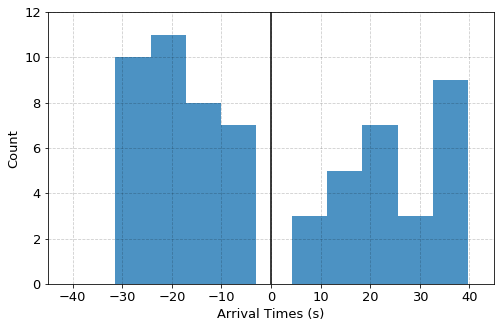

In [894]:
plt.figure(figsize=(8,5))
plt.ylim(0,12)
plt.xlim(-45,45)
plt.axvline(x=0, color='black', linestyle='-', zorder = 0)
plt.hist(arrivaltimes_after,bins=10, alpha=0.8)
plt.yticks([0,2,4,6,8,10,12], fontsize = 13) 
plt.xticks([-40,-30,-20,-10,0,10,20,30,40], fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Arrival Times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.savefig('Q7')
plt.show()

Now you need to make a first guess at the origin time and epicenter. It might help to first show the station locations on a map, with or without state borders and other topographic features. If you don't have experience with cartographic Python functions, just convert the coordinates to km and plot them in a Cartesian projection (basically a y vs. x graph). 

Use a map to read the latitude and longitude of a handful of points on the coastline of Alaska and use these (converted to km) to draw a polygon on your map that very crudely represents the coastlines.  

**Question 8**: Based on the map and each station’s $P$ wave arrival time, make an educated initial guess for the epicenter $(x_o, y_o)$ and for the origin time $t_o $. Plot the crude coastline polygon and your initial guess of the epicenter on your map with a clearly identifyable symbol, and add the station locations on the map using another symbol (a triangle is common). 

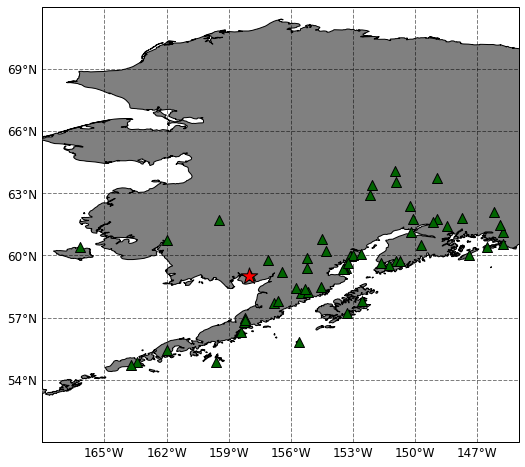

In [895]:
import cartopy.feature as cfeature

lon2kmlist = []; lat2kmlist = []
for i in range(len(lon)):
    lon2kmlist.append(lon[i]/lon2km) 
    lat2kmlist.append(lat[i]/lat2km) 

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-168,-145,51,72], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='10m',edgecolor='black', facecolor='grey')
ax.add_feature(feature,zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
plt.scatter(lon2kmlist,lat2kmlist,s=100,zorder=100,color='darkgreen',edgecolors='black',marker="^")
plt.scatter(-8848/lon2km,6560/lat2km,s=300,zorder=100,c='red',edgecolors='black',marker='*')
plt.savefig('Q8')
plt.show()

In [896]:
x_ig = -8848/lon2km; print(x_ig) # longitude, x initial guess
y_ig = 6560/lat2km; print(y_ig) # latitude, y initial guess

-158.0
58.99811134094793


**Question 9**: Now have your program compute 
1. the vector $\mathbf{D} = \mathbf{D}(x_o,y_o,z_o) $ with distances to all stations, and
2. the data vector with residual times, corrected for the predicted times. The predicted times depend on the initial guess for the origin time and epicenter. In other words: for each station you subtract the origin time of the earthquake, and the travel time (D/$\alpha$) from epicenter to station, from the arrival time at that station.

**Question 10**: Plot a histogram of the residual times, in a way that allows for an easy visual comparison with the histogram plotted in Question 7.

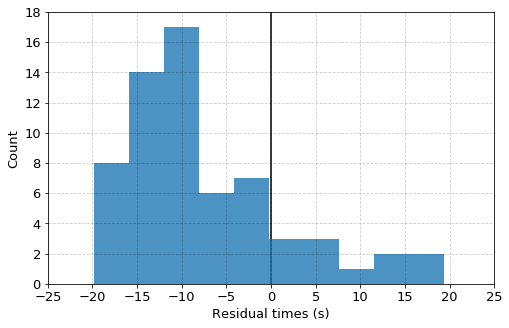

In [897]:
x0 = -8848 ; y0 = 6560.21; t0 = 20; z0 = 120

# 1. compute the vector D with distances to all stations
distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)
# print(distance_vec)

# 2. data vector with residual times corrected for predicted times
restime_cor = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor.append(restime_val)
# print(restime_cor)

plt.figure(figsize=(8,5))
plt.ylim(0,18)
plt.xlim(-20,20)
plt.axvline(x=0, color='black', linestyle='-', zorder = 0)
plt.hist(restime_cor,bins=10, alpha=0.8)
plt.yticks([0,2,4,6,8,10,12,14,16,18], fontsize = 13) 
plt.xticks([-25,-20,-15,-10,-5,0,5,10,15,20,25], fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Residual times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.savefig('Q9')
plt.show()

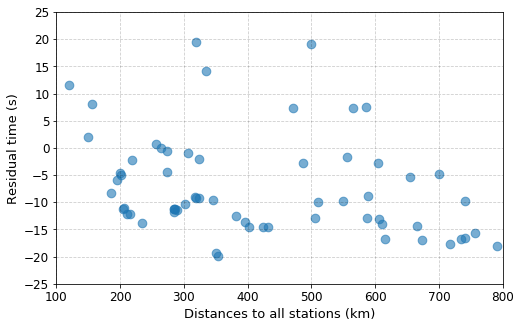

In [898]:
# as a check
plt.figure(figsize=(8,5))
plt.xlim(100,800)
# plt.ylim(-25,25)
plt.scatter(distance_vec,restime_cor,alpha=0.6,s=75)
plt.xlabel('Distances to all stations (km)', fontsize = 13)
plt.ylabel('Residual time (s)', fontsize = 13)
plt.xticks([100,200,300,400,500,600,700,800], fontsize = 12,rotation=0) 
plt.yticks([-25,-20,-15,-10,-5,0,5,10,15,20,25], fontsize = 12) 
# plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], fontsize = 12) 

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.savefig('Q10b')
plt.show()

**Question 11**: 
1. The matrix $\mathbf{G} $ as defined above, by you,
2. Use the `numpy.linalg` module to compute the generalized inverse matrix $\mathbf{G}^{-g} = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T $  
3. Then calculate the least squares solution, $m_j = G_{ji}^{-g} d_i $, to the problem $ d_i = G_{ij} m_j $.

Note: **Do not use short cut functions like lsqr( )** given that you are in class to learn what a least-squares solution means, rather than how to find a Python function that does something neat. 

In [899]:
from numpy.linalg import inv

left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
for i in range(len(lon2kmlist)):
    listofones.append(1.0)
    left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
    left_col_list.append(left_col)
    right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
    right_col_list.append(right_col)
    
G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
GT = np.transpose(G_matrix) 
GTG = np.matmul(GT, G_matrix)
invGT = inv(GTG)
Ginvtimes_gen = np.matmul(invGT, GT)
m_j = np.matmul(Ginvtimes_gen, restime_cor)
print(m_j)

[  3.47761807 150.66313201 -47.93493124]


**Question 12**: Update the initial guess for origin time and epicenter cordinates with the values from vector $\mathbf{m} $ and plot the new epicenter on the map with a different symbol or color than the initial guess.

In [900]:
t_new = t0 + m_j[0]; print(t_new)
x_new = x0 + m_j[1]; print(x_new)
y_new = y0 + m_j[2]; print(y_new)

23.477618071752083
-8697.336867991728
6512.27506876285


**Question 13**: Redefine the initial guess as the updated epicenter and origin time and repeat the procedure in Question 9 through 12 until the solution has converged. Choose a suitable convergence criterion to stop the iterative inversion process and explain and/or justify your choice. 

In [901]:
j = 0
xit = [-8697.336867991728]; yit = [6512.27506876285]; otit = [23.477618071752083]
for j in range(6):
    x0 = x_new; y0 = y_new; t0 = t_new
    distance_vec = []
    for i in range(len(lon2kmlist)):
        xdiff_sq = (lon[i]-float(x0))**2
        ydiff_sq = (lat[i]-float(y0))**2
        zdiff_sq = (elv[i]-z0)**2 
        D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
        distance_vec.append(D)
    restime_cor = []
    for i in range(len(distance_vec)):
        restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
        restime_cor.append(restime_val)
    left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
    for i in range(len(lon2kmlist)):
        listofones.append(1.0)
        left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
        left_col_list.append(left_col)
        right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
        right_col_list.append(right_col)
    G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
    GT = np.transpose(G_matrix) 
    GTG = np.matmul(GT, G_matrix)
    invGT = inv(GTG)
    Ginvtimes_gen = np.matmul(invGT, GT)
    m_j = np.matmul(Ginvtimes_gen, restime_cor)
    print(m_j)
    
    t_new = t0 + m_j[0]; otit.append(t_new)
    x_new = x0 + m_j[1]; xit.append(x_new)
    y_new = y0 + m_j[2]; yit.append(y_new)
    j += 1
    print('*****')

[ -3.94622014   5.54445909 -16.6443399 ]
*****
[-0.08261193  0.83099812 -1.15905521]
*****
[-0.00176166  0.07028523 -0.07886734]
*****
[-9.37862774e-05  5.32247188e-03 -5.70277978e-03]
*****
[-6.65379684e-06  3.94609859e-04 -4.19251629e-04]
*****
[-4.88787417e-07  2.91460396e-05 -3.09209681e-05]
*****


In [902]:
print(xit)
print(yit)
print(otit)

[-8697.336867991728, -8691.792408898616, -8690.961410778467, -8690.891125546614, -8690.885803074732, -8690.885408464874, -8690.885379318834]
[6512.27506876285, 6495.630728859024, 6494.471673648228, 6494.39280630336, 6494.387103523577, 6494.386684271948, 6494.38665335098]
[23.477618071752083, 19.531397936201504, 19.44878600152392, 19.447024337156584, 19.446930550879173, 19.446923897082335, 19.446923408294918]


----------> Answer: I have chosen to define the convergence criterion as the coordinates (x, y, t) where the next iteration of (x, y, t) coordinates reproduce the same values to the thousandth decimal place (.XXX) in all three elements. This is a rather arbitrary criterion and the convergence criterion perhaps does not need to be as strict realistically.

**Question 14**: Use the final and best estimate of the epicenter and origin time to recalculate predicted arrival times with the non-linear equations from above. Subtract these from the measured arrival times and plot the residuals in a histogram, in a way that allows for an easy visual comparison with the histograms plotted in Questions 7 and 10.

-3.635046408499687e-13
1.4129621372935948


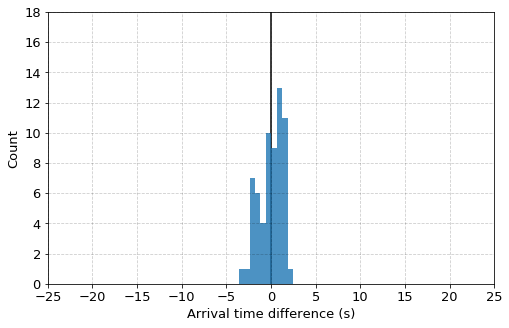

In [903]:
x0 = -8690.885379318834; y0 = 6494.38665335098; t0 = 19.446923408294918; z0 = 120
t_o_best = t0; x_o_best = x0; y_o_best = y0; z_o = 120

artime_pred = []; artime_diff = []
for i in range(len(lat)):
    x = lon[i]; y = lat[i]; z = elv[i]; arrivtime_mes = Ptm[i]
    dist = sqrt(((x - x_o_best)**2) + ((y - y_o_best)**2) + ((z - z_o)**2))
    arrivtime_pred = t_o_best + (dist/alpha)
    artime_pred.append(arrivtime_pred)
    arrivetime_diff = arrivtime_mes - arrivtime_pred
    artime_diff.append(arrivetime_diff)
print(np.nanmean(artime_diff))
print(np.nanstd(artime_diff))



plt.figure(figsize=(8,5)); plt.ylim(0,18); plt.xlim(-25,25)
plt.axvline(x=0, color='black', linestyle='-', zorder = 0)
plt.hist(artime_diff,bins=10, alpha=0.8)
plt.yticks([0,2,4,6,8,10,12,14,16,18], fontsize = 13) 
plt.xticks([-25,-20,-15,-10,-5,0,5,10,15,20,25], fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Arrival time difference (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.savefig('Q14')
plt.show()

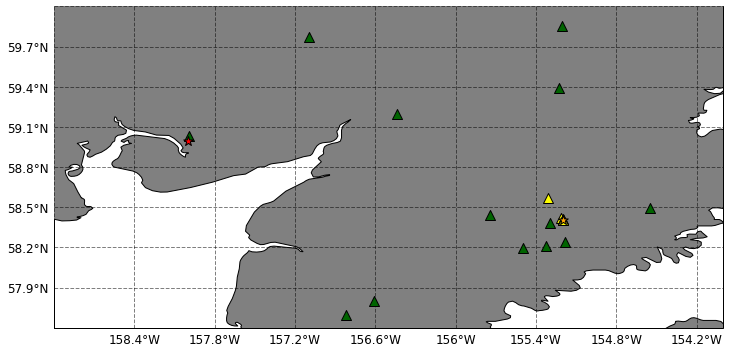

In [904]:
latlat = []; lonlon = []
for i in range(len(xit)):
    lonlon.append(xit[i] / lon2km)
    latlat.append(yit[i] / lat2km)

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-159,-154,57.6,60], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='10m',edgecolor='black', facecolor='grey')
ax.add_feature(feature,zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
plt.scatter(lon2kmlist,lat2kmlist,s=100,zorder=100,color='darkgreen',edgecolors='black',marker="^")
plt.scatter(lonlon,latlat,s=100,zorder=50,color='yellow',edgecolors='black',marker="^")
plt.scatter(-8848/lon2km,6560/lat2km,s=100,zorder=200,c='red',edgecolors='black',marker='*')
plt.scatter(-8690.885379318834/lon2km,6494.38665335098/lat2km,s=100,zorder=200,c='orange',edgecolors='black',marker='*')


plt.savefig('Q14b')
plt.show()

**Question 15**: Repeat the procedure from Question 8 through 13 using 
1. a different initial guess, and
2. a different convergence criterion.
Discuss whether and why the final and best estimate of the epicenter and origin time is the same or different in both cases.

In [905]:
j = 0
xit = []; yit = []; otit = []
x_new = -9000; y0_new = 6700; t_new = 30 #new initial guess
for j in range(10):
    x0 = x_new; y0 = y_new; t0 = t_new
    distance_vec = []
    for i in range(len(lon2kmlist)):
        xdiff_sq = (lon[i]-float(x0))**2
        ydiff_sq = (lat[i]-float(y0))**2
        zdiff_sq = (elv[i]-z0)**2 
        D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
        distance_vec.append(D)
    restime_cor = []
    for i in range(len(distance_vec)):
        restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
        restime_cor.append(restime_val)
    left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
    for i in range(len(lon2kmlist)):
        listofones.append(1.0)
        left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
        left_col_list.append(left_col)
        right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
        right_col_list.append(right_col)
    
    G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
    GT = np.transpose(G_matrix) 
    GTG = np.matmul(GT, G_matrix)
    invGT = inv(GTG)
    Ginvtimes_gen = np.matmul(invGT, GT)
    m_j = np.matmul(Ginvtimes_gen, restime_cor)
    print(m_j)
    
    t_new = t0 + m_j[0]; print(t_new); otit.append(t_new)
    x_new = x0 + m_j[1]; print(x_new); xit.append(x_new)
    y_new = y0 + m_j[2]; print(y_new); yit.append(y_new)
    
    if (m_j[0] < -1 and m_j[0] > 1) and (m_j[1] < -1 and m_j[1] > 1) and (m_j[2] < -1 and m_j[2] > 1):  #new convergence criteria  
        pass
    elif (m_j[0] >= -1 and m_j[0] <= 1) and (m_j[1] >= -1 and m_j[1] <= 1) and (m_j[2] >= -1 and m_j[2] <= 1):  
        break
    j += 1
    print('*****')

[  0.53425223 324.59736896  51.72858039]
30.53425222828878
-8675.402631037194
6546.115233737993
*****
[-10.59496449 -16.19857289 -48.34692741]
19.939287733676995
-8691.60120392549
6497.768306327743
*****
[-0.48669664  0.58010426 -3.19950947]
19.45259109119658
-8691.021099669197
6494.5687968600805
*****
[-0.00545139  0.12451659 -0.16977336]
19.447139704058365
-8690.896583081823
6494.399023498797


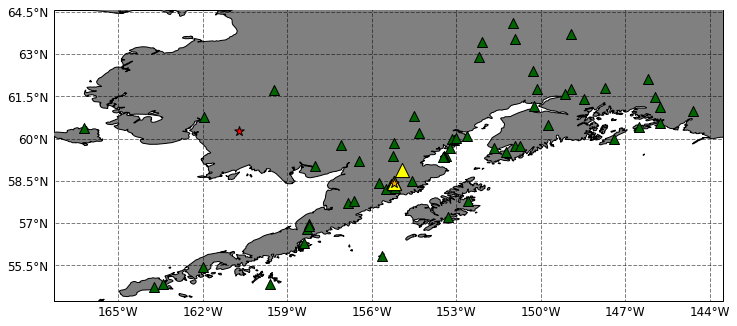

In [906]:
latlat = []; lonlon = []
for i in range(len(xit)):
    lonlon.append(xit[i] / lon2km)
    latlat.append(yit[i] / lat2km)

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-159,-154,57.6,60], ccrs.PlateCarree())
# ax.set_extent([-159,-154,57.6,60], ccrs.PlateCarree())
feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='10m',edgecolor='black', facecolor='grey')
ax.add_feature(feature,zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
plt.scatter(lon2kmlist,lat2kmlist,s=100,zorder=100,color='darkgreen',edgecolors='black',marker="^")
plt.scatter(lonlon,latlat,s=200,zorder=100,color='yellow',edgecolors='black',marker="^")
plt.scatter(-9000/lon2km,6700/lat2km,s=100,zorder=200,c='red',edgecolors='black',marker='*')
plt.scatter(-8690.896582406838/lon2km,6494.399022755477/lat2km,s=100,zorder=200,c='orange',edgecolors='black',marker='*')

plt.savefig('Q15')
plt.show()

-9.064528950059665e-06


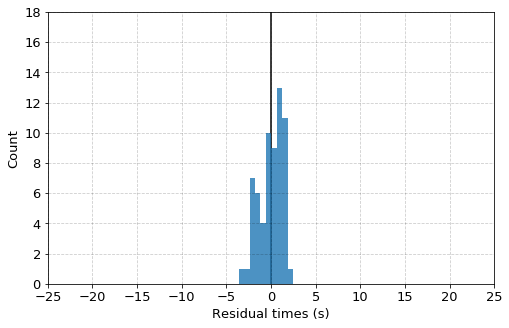

In [907]:
x0 = -8690.896582406838; y0 = 6494.399022755477; t0 = 19.447139690566253; z0 = 120
t_o_best = t0; x_o_best = x0; y_o_best = y0; z_o = 120

artime_pred = []; artime_diff = []
for i in range(len(lat)):
    x = lon[i]; y = lat[i]; z = elv[i]; arrivtime_mes = Ptm[i]
    dist = sqrt(((x - x_o_best)**2) + ((y - y_o_best)**2) + ((z - z_o)**2))
    arrivtime_pred = t_o_best + (dist/alpha)
    artime_pred.append(arrivtime_pred)
    arrivetime_diff = arrivtime_mes - arrivtime_pred
    artime_diff.append(arrivetime_diff)
print(np.nanmean(artime_diff))
plt.figure(figsize=(8,5)); plt.ylim(0,18); plt.xlim(-25,25)
plt.axvline(x=0, color='black', linestyle='-', zorder = 0)
plt.hist(artime_diff,bins=10, alpha=0.8)
plt.yticks([0,2,4,6,8,10,12,14,16,18], fontsize = 13) 
plt.xticks([-25,-20,-15,-10,-5,0,5,10,15,20,25], fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Residual times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.savefig('Q15bb')
plt.show()

----------> Answer: In this case, the intial guess was chosen to be further away from earthquake stations and from what a common-sense initial guess might be. This is to a check on whether the method still works for less likely initial guesses. This new convergence criterion is less strict compared to the one chosen to answer Q14. Here, the iterative cycle of finding (x, y, t) is terminated when the hypocenter change is within 1 kilomenter in x and y and 1 second in time. The results are very close (so same) to the best estimate of the epicenter and origin time as in Q14. The conclusions are the same because through the iterative process of using the design matrix G and the data vector d, we are able to to make better guesses of the epicenter and origin time with modifications of model vector m, which results in better and better guesses. However, I tried an initial guess (x0 = -10000, y0 = 7000, t0 = 60) that  widely differs from what an educated initial guess might be, the method breaks down. This is due to the limitations of the Taylor expansion where the function needs to be expanded around the vicinity of the true answer. 

**Question 16**: Submit a report of this process and your findings. Among normal report components (such as introduction, methods, data, results, and conclusions) the report should included answers to the above questions, roughly in the order that they are asked in. The report needs to have your name, sections, page numbers, legible and comprehensible English that preferably is grammatically correct and with minimal spelling errors, figures with descriptive captions and labeled axes, page numbers, an appendix with the python code that was used, and other common-sense elements. 

----------> Answer: As PDF submitted through Canvas.